In [32]:
import numpy as np
import pandas as pd
import requests
import os, glob
import psutil
import matplotlib.pyplot as plt

website = 'https://www.kaggle.com/rsrishav/youtube-trending-video-dataset?select=US_category_id.json'

<h1>Functions and constants that we work with</h1>

In [33]:
#youtube catagory conversion
cat = {2:"Autos & Vehicles",
1:"Film & Animation",
10:"Music",
15:"Pets & Animals",
17:"Sports",
18:"Short Movies",
19:"Travel & Events",
20:"Gaming",
21:"Videoblogging",
22:"People & Blogs",
23:"Comedy",
24:"Entertainment",
25:"News & Politics",
26:"Howto & Style",
27:"Education",
28:"Science & Technology",
29:"Nonprofits & Activism",
30:"Movies",
31:"Anime/Animation",
32:"Action/Adventure",
33:"Classics",
34:"Comedy",
35:"Documentary",
36:"Drama",
37:"Family",
38:"Foreign",
39:"Horror",
40:"Sci-Fi/Fantasy",
41:"Thriller",
42:"Shorts",
43:"Shows",
44:"Trailers"}

In [34]:
def reader(file):
    data = pd.read_csv(file)
    data['country']=[file[:2] for f in data['title']]
    data['catagory']=[cat[c] if c in cat else'Na' for c in data['categoryId']]
    return(data)

def current_dir():
    return(os.getcwd())

def get_username():
    return psutil.Process().username().split('\\')[1]

<h1>Check to see if current directory matches where files are stored</h1>

In [35]:
print(current_dir())

C:\Users\paulm\Desktop\Homework\Project


<h2>Getting all CSV files for the Data</h2>

In [36]:
os.chdir(current_dir())

li = []
sizes = 0
for file in glob.glob("*.csv", recursive = True):
    li.append(reader(file))
    print(file,'-----',len(reader(file).index))
    sizes += len(reader(file).index)
print("total size for top 30 videos in 11 countries is "+str(sizes))
result = pd.concat(li, axis=0, ignore_index=True)

BR_youtube_trending_data.csv ----- 40393
CA_youtube_trending_data.csv ----- 40345
DE_youtube_trending_data.csv ----- 40347
FR_youtube_trending_data.csv ----- 40394
GB_youtube_trending_data.csv ----- 40395
IN_youtube_trending_data.csv ----- 37792
JP_youtube_trending_data.csv ----- 40396
KR_youtube_trending_data.csv ----- 37354
MX_youtube_trending_data.csv ----- 40199
RU_youtube_trending_data.csv ----- 40257
US_youtube_trending_data.csv ----- 40392
total size for top 30 videos in 11 countries is 438264


In [37]:
for c in result.columns:
    print(c)

video_id
title
publishedAt
channelId
channelTitle
categoryId
trending_date
tags
view_count
likes
dislikes
comment_count
thumbnail_link
comments_disabled
ratings_disabled
description
country
catagory


In [38]:
result.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,438264.000000,4.382640e+05,4.382640e+05,4.382640e+05,4.382640e+05
mean,19.027926,1.709070e+06,1.056051e+05,2.895660e+03,1.129388e+04
std,7.068291,5.609668e+06,4.051994e+05,5.631809e+04,1.090949e+05
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.131200e+05,7.463000e+03,1.690000e+02,5.970000e+02
50%,22.000000,5.318070e+05,2.253400e+04,4.750000e+02,1.713000e+03
75%,24.000000,1.371926e+06,7.298375e+04,1.486000e+03,5.202000e+03
max,29.000000,2.623193e+08,1.625479e+07,1.234147e+07,6.303708e+06


In [39]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438264 entries, 0 to 438263
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           438264 non-null  object
 1   title              438264 non-null  object
 2   publishedAt        438264 non-null  object
 3   channelId          438264 non-null  object
 4   channelTitle       438263 non-null  object
 5   categoryId         438264 non-null  int64 
 6   trending_date      438264 non-null  object
 7   tags               438264 non-null  object
 8   view_count         438264 non-null  int64 
 9   likes              438264 non-null  int64 
 10  dislikes           438264 non-null  int64 
 11  comment_count      438264 non-null  int64 
 12  thumbnail_link     438264 non-null  object
 13  comments_disabled  438264 non-null  bool  
 14  ratings_disabled   438264 non-null  bool  
 15  description        432994 non-null  object
 16  country            4

In [15]:
new_columns=['categoryId','view_count','likes','dislikes','comment_count']
analyze=result[new_columns]
analyze

,categoryId,view_count,likes,dislikes,comment_count
0,22,263835,85095,487,4500
1,10,6000070,714310,15176,31040
2,22,2296748,39761,5484,0
3,20,300510,46222,242,2748
4,23,327235,22059,3972,2751
...,...,...,...,...,...
438259,20,453545,15481,379,2289
438260,20,2349296,62948,11658,20066
438261,24,2236533,189768,922,14878
438262,22,841876,54405,573,9090


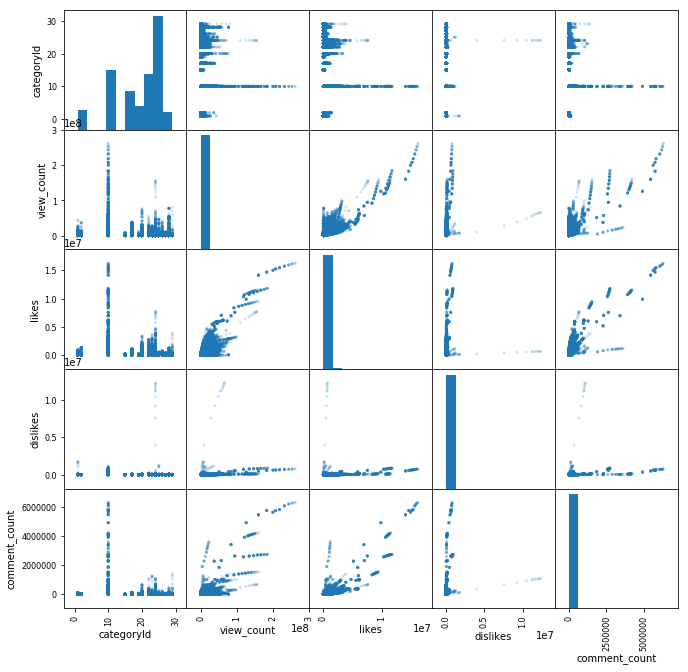

In [16]:
pd.plotting.scatter_matrix(analyze,alpha = 0.2,range_padding=0.3,figsize = (11,11))
plt.show()

In [16]:
average = analyze.groupby(['categoryId']).count()
average

,view_count,likes,dislikes,comment_count
categoryId,,,,
1,15116,15116,15116,15116
2,11165,11165,11165,11165
10,79327,79327,79327,79327
15,2733,2733,2733,2733
17,48952,48952,48952,48952
19,2565,2565,2565,2565
20,28803,28803,28803,28803
22,47362,47362,47362,47362
23,26923,26923,26923,26923


In [12]:
result.groupby(['country']).mean()

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
country,,,,,,,
BR,18.378432,1.519071e+06,118591.747778,2168.888372,10288.868319,0.014730,0.005323
CA,19.231057,2.439097e+06,143712.499938,3255.500161,15105.609840,0.017276,0.007312
DE,18.644286,1.338032e+06,85601.582869,2291.850472,9888.550524,0.015838,0.007981
FR,18.502797,1.071915e+06,80875.259915,1609.042184,7864.472100,0.009927,0.010645
GB,19.136527,1.894635e+06,113139.976705,2524.318802,11887.795841,0.026587,0.006783
IN,20.672867,2.644639e+06,133153.575016,8829.967903,15313.253202,0.010399,0.008811
JP,19.425636,1.091188e+06,55249.769730,1419.481607,7350.674077,0.059610,0.063249
KR,20.163543,1.439032e+06,75962.589361,1618.252690,10415.990362,0.007041,0.017535
MX,18.266773,2.032517e+06,150530.550685,3151.742730,14046.568497,0.007388,0.003134


In [17]:
cat = {2:"Autos & Vehicles",
1:"Film & Animation",
10:"Music",
15:"Pets & Animals",
17:"Sports",
18:"Short Movies",
19:"Travel & Events",
20:"Gaming",
21:"Videoblogging",
22:"People & Blogs",
23:"Comedy",
24:"Entertainment",
25:"News & Politics",
26:"Howto & Style",
27:"Education",
28:"Science & Technology",
29:"Nonprofits & Activism",
30:"Movies",
31:"Anime/Animation",
32:"Action/Adventure",
33:"Classics",
34:"Comedy",
35:"Documentary",
36:"Drama",
37:"Family",
38:"Foreign",
39:"Horror",
40:"Sci-Fi/Fantasy",
41:"Thriller",
42:"Shorts",
43:"Shows",
44:"Trailers"}

In [29]:
result['catagory']=[cat[c] if c in cat else'Na' for c in result['categoryId']]
result

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,catagory
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",BR,People & Blogs
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR,Music
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...,BR,People & Blogs
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11T15:00:09Z,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12T00:00:00Z,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,242,2748,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,Você se unirá aos Lunari e aos Solari em Targo...,BR,Gaming
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11T20:04:02Z,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12T00:00:00Z,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,3972,2751,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...,BR,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438259,hjTXabSgoFk,Fortnite Item Shop *NEW* ALIEN BUNDLES! [Febru...,2021-02-26T00:08:30Z,UCIZP6nCTyU9VV0zIhY7q1Aw,I Talk,20,2021-03-05T00:00:00Z,fortnite|fortnite battle royale|fortnite comme...,453545,15481,379,2289,https://i.ytimg.com/vi/hjTXabSgoFk/default.jpg,False,False,"Fortnite Item Shop right now on February 25th,...",US,Gaming
438260,BjCwUk06ZSk,Return to the Sinnoh region in Pokémon Brillia...,2021-02-26T15:19:40Z,UCFctpiB_Hnlk3ejWfHqSm6Q,The Official Pokémon YouTube channel,20,2021-03-05T00:00:00Z,[None],2349296,62948,11658,20066,https://i.ytimg.com/vi/BjCwUk06ZSk/default.jpg,False,False,Sinnoh. Remakes.Confirmed.Experience the nosta...,US,Gaming
438261,g0Oj4A2rslY,Love Alarm Season 2 | Official Trailer | Netfl...,2021-02-26T00:00:19Z,UCpiCK8c6PBktcxq7Az_t4RQ,The Swoon,24,2021-03-05T00:00:00Z,netflix|korean drama|the swoon|ซีรี่ส์เกาหลี|韓...,2236533,189768,922,14878,https://i.ytimg.com/vi/g0Oj4A2rslY/default.jpg,False,False,The updated Love Alarm app v2.0 now shows you ...,US,Entertainment
438262,GPsO_SRUXb8,I Watched WandaVision Ep. 8 in 0.25x Speed and...,2021-02-27T08:22:27Z,UCRI00CwLZdLRCWg5BdDOsNw,The Canadian Lad,22,2021-03-05T00:00:00Z,Wandavision|wandavision|WandaVision in 0.25x S...,841876,54405,573,9090,https://i.ytimg.com/vi/GPsO_SRUXb8/default.jpg,False,False,Download Curiositystream today! https://curio...,US,People & Blogs


In [30]:
result.groupby(['catagory']).count()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
catagory,,,,,,,,,,,,,,,,,
Autos & Vehicles,11165,11165,11165,11165,11165,11165,11165,11165,11165,11165,11165,11165,11165,11165,11165,11086,11165
Comedy,26923,26923,26923,26923,26923,26923,26923,26923,26923,26923,26923,26923,26923,26923,26923,26406,26923
Education,8385,8385,8385,8385,8385,8385,8385,8385,8385,8385,8385,8385,8385,8385,8385,8192,8385
Entertainment,114740,114740,114740,114740,114740,114740,114740,114740,114740,114740,114740,114740,114740,114740,114740,113940,114740
Film & Animation,15116,15116,15116,15116,15116,15116,15116,15116,15116,15116,15116,15116,15116,15116,15116,14989,15116
Gaming,28803,28803,28803,28803,28803,28803,28803,28803,28803,28803,28803,28803,28803,28803,28803,28575,28803
Howto & Style,16853,16853,16853,16853,16853,16853,16853,16853,16853,16853,16853,16853,16853,16853,16853,16718,16853
Music,79327,79327,79327,79327,79327,79327,79327,79327,79327,79327,79327,79327,79327,79327,79327,78758,79327
News & Politics,19902,19902,19902,19902,19902,19902,19902,19902,19902,19902,19902,19902,19902,19902,19902,19547,19902


In [40]:
result.groupby(['country','catagory']).mean()

categoryId    view_count          likes  \
country catagory                                                        
BR      Autos & Vehicles             2.0  3.030752e+05   33662.612981   
        Comedy                      23.0  8.579002e+05   82408.912908   
        Education                   27.0  1.685684e+05   15791.528557   
        Entertainment               24.0  9.961450e+05  102025.526461   
        Film & Animation             1.0  1.636361e+06   86138.368539   
...                                  ...           ...            ...   
US      People & Blogs              22.0  2.283884e+06  138130.357795   
        Pets & Animals              15.0  1.263848e+06   56168.427419   
        Science & Technology        28.0  2.888250e+06   99249.287089   
        Sports                      17.0  2.055068e+06   43580.868852   
        Travel & Events             19.0  5.242961e+05   23120.040462   

                                 dislikes  comment_count  comments_disabled  \
country catagory                                                              
BR      Autos & Vehicles       290.093750    1755.430288           0.000000   
        Comedy                1306.010368    3138.346812           0.025402   
        Education              274.656282     843.276220           0.106957   
        Entertainment         1440.564080    6190.305786           0.016785   
        Film & Animation      1708.982022    5880.946067           0.000000   
...                                   ...            ...                ...   
US      People & Blogs        4367.993516   11669.134394           0.036251   
        Pets & Animals         844.826613    5045.173387           0.000000   
        Science & Technology  2757.651189    7809.124575           0.071348   
        Sports                1456.111066    4652.092213           0.007992   
        Travel & Events        594.693642    2677.572254           0.000000   

                              ratings_disabled  
country catagory                                
BR      Autos & Vehicles              0.000000  
        Comedy                        0.000000  
        Education                     0.000000  
        Entertainment                 0.001481  
        Film & Animation              0.000000  
...                                        ...  
US      People & Blogs                0.018273  
        Pets & Animals                0.000000  
        Science & Technology          0.006795  
        Sports                        0.005738  
        Travel & Events               0.000000  

[164 rows x 7 columns]